# Produce a market study with Python for the company "La poule qui chante"

La poule qui chante is a French food company. It wants to expand internationally.

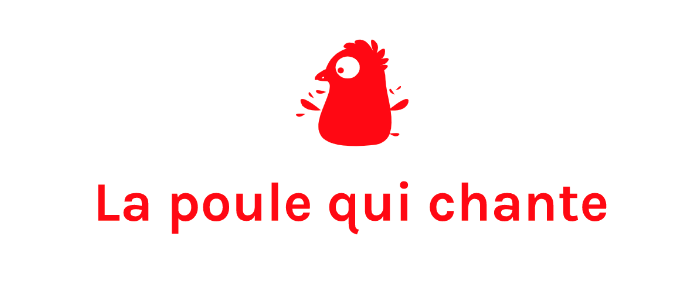

# Summary:

## Part 1: Data Preparation and Cleaning

- <a href="#C1"> 1- Objective</a>
- <a href="#C2"> 2- Requirements</a>
- <a href="#C3"> 3- Indicator Selection</a>
- <a href="#C4"> 4- Library Imports</a>
- <a href="#C5"> 5- Data Imports</a>
- <a href="#C6"> 6- Data Preparation</a>
- <a href="#C7"> 7- Creation of New Variables for Analysis</a>
- <a href="#C8"> 7-1- Demographic Growth Rate for 2016-2017</a>
- <a href="#C9"> 7-2- Import Dependency Rate (IDR)</a>
- <a href="#C10"> 7-3- Self-sufficiency Rate</a>
- <a href="#C11"> 7-4- GDP Growth Rate (GDP%) (2016-2017)</a>
- <a href="#C12"> 8- Data Merging</a>

## Part 2: Exploratory Data Analysis

- <a href="#C13"> 1- Correlation Between Different Variables</a>
- <a href="#C14"> 2- Correlation Matrix</a>
- <a href="#C15"> 3- Distribution Check of Variables for All Individuals</a>

## Part 3: Clustering and Associated Visualizations

- <a href="#C16"> 1- Data Normalization</a>
- <a href="#C17"> 2- Hierarchical Clustering Analysis (HCA) with Dendrogram Visualization</a>
- <a href="#C18"> 3- K-means Method</a>
- <a href="#C19"> 3-1- Elbow Method</a>
- <a href="#C20"> 3-2- Display of Clusters and Centroids</a>
- <a href="#C21"> 3-3- Silhouette Coefficient</a>
- <a href="#C22"> 4- Group Analysis</a>
- <a href="#C23"> 4-1- Class Splitting - Group Materialization</a>
- <a href="#C24"> 4-2- Box Plot Representation of Variable Distribution by Group</a>
- <a href="#C25"> 4-3- Cross-Analysis of Country Clusters with Different Variables</a>
- <a href="#C26"> 4-4- Correlations Between Variables in Each Group</a>
- <a href="#C27"> 5- Principal Component Analysis (PCA)</a>
- <a href="#C28"> 6- Correlation Circles</a>
- <a href="#C29"> 7- Projection of Individuals</a>
- <a href="#C30"> 8- Exploration of Selected Cluster</a>
- <a href="#C31"> Conclusion</a>

# Partie 1 : Data preparation and cleansing

# <a name="C1"> 1- Objective </a>

* The aim will be to propose an initial analysis of the groups of countries we could target for exporting our chickens. 
* We will then look at the market in more detail. 

# <a name="C2"> 2- Requirements</a>

* Test the hierarchical ascending classification, using a dendrogram as a visualisation. 

* Use the k-means method to refine the analysis and compare the results of the two clustering methods (analyse the centroids of the classes). 

* Carry out a PCA to visualise the results of the analysis, understand the groups, the links between variables and the links between individuals.

# <a name="C3"> 3- Indicator Selection</a>

* Demographic growth (2016-2017)
* Availability
* Import dependency ratio (IDR)
* Self-sufficiency rate (SIR)
* Gross domestic product growth rate (GDP%) (2016-2017)

# <a name="C4"> 4- Library Imports</a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import cluster, metrics
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from matplotlib.collections import LineCollection
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# <a name="C5"> 5- Data Imports</a>

To import, the files in our possession:

* The population file (2000-2018), i.e. Population_2000_2018.csv
* The food availability file (2017), i.e. DisponibiliteAlimentaire_2017.csv
* Gross domestic product file (2016-2017), i.e. PIB.csv

We can now load the csv files, in a dataframe that we will respectively name (df_pop), (df_dispoAlim, (PIB). We then display the first 5 lines.

In [2]:
df_pop = pd.read_csv("Population_2000_2018.csv", decimal=".", index_col=0)
df_pop.head()

,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
Code Domaine,,,,,,,,,,,,,,
OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [3]:
df_dispoAlim = pd.read_csv("DisponibiliteAlimentaire_2017.csv", decimal=".", index_col=0)
df_dispoAlim.head()

,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
Code Domaine,,,,,,,,,,,,,
FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [4]:
PIB = pd.read_csv("PIB.csv", decimal=".", index_col=0)
PIB.head()

,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
Code Domaine,,,,,,,,,,,,,,
MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2016,2016,US$,509.271172,X,Ciffre de sources internationales,NaN
MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,520.616409,X,Ciffre de sources internationales,NaN
MK,Indicateurs macro,710,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2016,2016,US$,5272.254217,X,Ciffre de sources internationales,NaN
MK,Indicateurs macro,710,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,6121.876572,X,Ciffre de sources internationales,NaN
MK,Indicateurs macro,8,Albanie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2016,2016,US$,4109.340457,X,Ciffre de sources internationales,NaN


# <a name="C6"> 6- Data Preparation</a>

#### Dataframe size

In [5]:
df_pop.shape

(4411, 14)

In [6]:
df_dispoAlim.shape

(176600, 13)

In [7]:
PIB.shape

(422, 14)

#### Global dataframe indications

In [8]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4411 entries, OA to OA
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Domaine                 4411 non-null   object 
 1   Code zone               4411 non-null   int64  
 2   Zone                    4411 non-null   object 
 3   Code Élément            4411 non-null   int64  
 4   Élément                 4411 non-null   object 
 5   Code Produit            4411 non-null   int64  
 6   Produit                 4411 non-null   object 
 7   Code année              4411 non-null   int64  
 8   Année                   4411 non-null   int64  
 9   Unité                   4411 non-null   object 
 10  Valeur                  4411 non-null   float64
 11  Symbole                 4411 non-null   object 
 12  Description du Symbole  4411 non-null   object 
 13  Note                    258 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory usag

In [9]:
df_dispoAlim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176600 entries, FBS to FBS
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Domaine                 176600 non-null  object 
 1   Code zone               176600 non-null  int64  
 2   Zone                    176600 non-null  object 
 3   Code Élément            176600 non-null  int64  
 4   Élément                 176600 non-null  object 
 5   Code Produit            176600 non-null  int64  
 6   Produit                 176600 non-null  object 
 7   Code année              176600 non-null  int64  
 8   Année                   176600 non-null  int64  
 9   Unité                   176600 non-null  object 
 10  Valeur                  176600 non-null  float64
 11  Symbole                 176600 non-null  object 
 12  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 18.9+ MB


In [10]:
PIB.info()

<class 'pandas.core.frame.DataFrame'>
Index: 422 entries, MK to MK
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Domaine                 422 non-null    object 
 1   Code zone (M49)         422 non-null    int64  
 2   Zone                    422 non-null    object 
 3   Code Élément            422 non-null    int64  
 4   Élément                 422 non-null    object 
 5   Code Produit            422 non-null    int64  
 6   Produit                 422 non-null    object 
 7   Code année              422 non-null    int64  
 8   Année                   422 non-null    int64  
 9   Unité                   422 non-null    object 
 10  Valeur                  422 non-null    float64
 11  Symbole                 422 non-null    object 
 12  Description du Symbole  422 non-null    object 
 13  Note                    0 non-null      float64
dtypes: float64(2), int64(5), object(7)
memory usage

#### The % of missing values per column

In [11]:
df_pop.isna().mean()

Domaine                   0.00000
Code zone                 0.00000
Zone                      0.00000
Code Élément              0.00000
Élément                   0.00000
Code Produit              0.00000
Produit                   0.00000
Code année                0.00000
Année                     0.00000
Unité                     0.00000
Valeur                    0.00000
Symbole                   0.00000
Description du Symbole    0.00000
Note                      0.94151
dtype: float64

In [12]:
df_dispoAlim.isna().mean()

Domaine                   0.0
Code zone                 0.0
Zone                      0.0
Code Élément              0.0
Élément                   0.0
Code Produit              0.0
Produit                   0.0
Code année                0.0
Année                     0.0
Unité                     0.0
Valeur                    0.0
Symbole                   0.0
Description du Symbole    0.0
dtype: float64

In [13]:
PIB.isna().mean()

Domaine                   0.0
Code zone (M49)           0.0
Zone                      0.0
Code Élément              0.0
Élément                   0.0
Code Produit              0.0
Produit                   0.0
Code année                0.0
Année                     0.0
Unité                     0.0
Valeur                    0.0
Symbole                   0.0
Description du Symbole    0.0
Note                      1.0
dtype: float64

#### Duplicates

In [14]:
df_pop.duplicated().sum()

0

In [15]:
df_dispoAlim.duplicated().sum()

0

In [16]:
PIB.duplicated().sum()

0

#### Different values for each column

In [17]:
df_pop.nunique()

Domaine                      1
Code zone                  238
Zone                       238
Code Élément                 1
Élément                      1
Code Produit                 1
Produit                      1
Code année                  19
Année                       19
Unité                        1
Valeur                    4398
Symbole                      2
Description du Symbole       2
Note                         1
dtype: int64

In [18]:
df_dispoAlim.nunique()

Domaine                      1
Code zone                  174
Zone                       174
Code Élément                17
Élément                     17
Code Produit                98
Produit                     98
Code année                   1
Année                        1
Unité                        4
Valeur                    7250
Symbole                      2
Description du Symbole       2
dtype: int64

In [19]:
PIB.nunique()

Domaine                     1
Code zone (M49)           211
Zone                      211
Code Élément                1
Élément                     1
Code Produit                1
Produit                     1
Code année                  2
Année                       2
Unité                       1
Valeur                    422
Symbole                     2
Description du Symbole      2
Note                        0
dtype: int64

#### The overall spread of our data

In [20]:
df_pop.describe()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,4411.000000,4411.0,4411.0,4411.000000,4411.000000,4.411000e+03
mean,132.202902,511.0,3010.0,2009.068238,2009.068238,2.963004e+04
std,75.854840,0.0,0.0,5.481539,5.481539,1.238029e+05
min,1.000000,511.0,3010.0,2000.000000,2000.000000,7.850000e-01
25%,68.000000,511.0,3010.0,2004.000000,2004.000000,3.921890e+02
50%,132.000000,511.0,3010.0,2009.000000,2009.000000,4.764741e+03
75%,195.000000,511.0,3010.0,2014.000000,2014.000000,1.821548e+04
max,299.000000,511.0,3010.0,2018.000000,2018.000000,1.427648e+06


In [21]:
df_dispoAlim.describe()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,176600.000000,176600.000000,176600.000000,176600.0,176600.0,176600.000000
mean,125.474740,3810.052894,2628.778545,2017.0,2017.0,210.554918
std,72.941699,2211.790089,91.993247,0.0,0.0,4762.047787
min,1.000000,645.000000,2511.000000,2017.0,2017.0,-10388.000000
25%,63.000000,684.000000,2556.000000,2017.0,2017.0,0.000000
50%,120.000000,5142.000000,2612.000000,2017.0,2017.0,0.120000
75%,188.000000,5301.000000,2732.000000,2017.0,2017.0,8.462500
max,276.000000,5911.000000,2899.000000,2017.0,2017.0,758548.000000


In [22]:
PIB.describe()

,Code zone (M49),Code Élément,Code Produit,Code année,Année,Valeur,Note
count,422.000000,422.0,422.0,422.000000,422.000000,422.000000,0.0
mean,429.407583,6119.0,22008.0,2016.500000,2016.500000,16534.716320,NaN
std,250.939413,0.0,0.0,0.500593,0.500593,25043.123892,NaN
min,4.000000,6119.0,22008.0,2016.000000,2016.000000,106.342719,NaN
25%,209.000000,6119.0,22008.0,2016.000000,2016.000000,2108.437381,NaN
50%,430.000000,6119.0,22008.0,2016.500000,2016.500000,6228.640844,NaN
75%,642.750000,6119.0,22008.0,2017.000000,2017.000000,19652.599551,NaN
max,894.000000,6119.0,22008.0,2017.000000,2017.000000,171278.066389,NaN


# <a name="C7"> 7- Creation of New Variables for Analysis</a>

# <a name="C5"> 7-1- Demographic Growth Rate for 2016-2017 </a>

**Demographic growth** or total population change is the difference between the size of a population at the end and the beginning of a given period.

In [23]:
df_pop_nv= df_pop.pivot_table(index = 'Zone', columns = 'Année', values = 'Valeur')
df_pop_nv

Année,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Zone,,,,,,,,,,,,,,,,,,,
Afghanistan,20779.953,21606.988,22600.770,23680.871,24726.684,25654.277,26433.049,27100.536,27722.276,28394.813,29185.507,30117.413,31161.376,32269.589,33370.794,34413.603,35383.032,36296.113,37171.921
Afrique du Sud,44967.708,45571.274,46150.913,46719.196,47291.610,47880.601,48489.459,49119.759,49779.471,50477.011,51216.964,52003.755,52832.658,53687.121,54544.186,55386.367,56207.646,57009.756,57792.518
Albanie,3129.243,3129.704,3126.187,3118.023,3104.892,3086.810,3063.021,3033.998,3002.678,2973.048,2948.023,2928.592,2914.096,2903.790,2896.305,2890.513,2886.438,2884.169,2882.740
Algérie,31042.235,31451.514,31855.109,32264.157,32692.163,33149.724,33641.002,34166.972,34730.608,35333.881,35977.455,36661.445,37383.895,38140.133,38923.692,39728.025,40551.392,41389.189,42228.408
Allemagne,81400.882,81453.885,81535.122,81614.380,81646.474,81602.741,81472.226,81277.830,81065.752,80899.961,80827.002,80855.632,80972.628,81174.367,81450.378,81787.411,82193.768,82658.409,83124.418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Îles Salomon,412.660,423.944,435.432,447.017,458.539,469.918,481.078,492.132,503.360,515.181,527.861,541.521,556.063,571.336,587.079,603.118,619.438,636.039,652.857
Îles Turques-et-Caïques,20.164,21.573,23.232,25.011,26.700,28.180,29.391,30.385,31.202,31.934,32.660,33.377,34.066,34.731,35.369,35.981,36.559,37.115,37.665
Îles Vierges américaines,108.722,108.691,108.561,108.360,108.092,107.794,107.462,107.115,106.756,106.412,106.087,105.793,105.534,105.303,105.114,104.958,104.835,104.751,104.680


In [24]:
# Demographic growth (2016-2017)
df_pop_nv['Croissance démographique (%)']=round(100*(df_pop_nv[2017]-df_pop_nv[2016]) /(df_pop_nv[2016]),2)
df_pop_nv.head()

Année,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Croissance démographique (%)
Zone,,,,,,,,,,,,,,,,,,,,
Afghanistan,20779.953,21606.988,22600.770,23680.871,24726.684,25654.277,26433.049,27100.536,27722.276,28394.813,29185.507,30117.413,31161.376,32269.589,33370.794,34413.603,35383.032,36296.113,37171.921,2.58
Afrique du Sud,44967.708,45571.274,46150.913,46719.196,47291.610,47880.601,48489.459,49119.759,49779.471,50477.011,51216.964,52003.755,52832.658,53687.121,54544.186,55386.367,56207.646,57009.756,57792.518,1.43
Albanie,3129.243,3129.704,3126.187,3118.023,3104.892,3086.810,3063.021,3033.998,3002.678,2973.048,2948.023,2928.592,2914.096,2903.790,2896.305,2890.513,2886.438,2884.169,2882.740,-0.08
Algérie,31042.235,31451.514,31855.109,32264.157,32692.163,33149.724,33641.002,34166.972,34730.608,35333.881,35977.455,36661.445,37383.895,38140.133,38923.692,39728.025,40551.392,41389.189,42228.408,2.07
Allemagne,81400.882,81453.885,81535.122,81614.380,81646.474,81602.741,81472.226,81277.830,81065.752,80899.961,80827.002,80855.632,80972.628,81174.367,81450.378,81787.411,82193.768,82658.409,83124.418,0.57


In [25]:
# Keep only the demographic growth column for our analysis
pop=df_pop_nv.loc[:,['Croissance démographique (%)']]
pop.head()

Année,Croissance démographique (%)
Zone,
Afghanistan,2.58
Afrique du Sud,1.43
Albanie,-0.08
Algérie,2.07
Allemagne,0.57


In [26]:
pop.shape

(238, 1)

In [27]:
# 2 null values
pop.isnull().sum()

Année
Croissance démographique (%)    2
dtype: int64

# <a name="C9"> 7-2- Import Dependency Rate (TDI) </a>

* When analysing a country's food situation, it is important to know what proportion of available domestic supplies comes from imports and what proportion comes from the country's own production.

* The higher the IDR, the greater the country's dependence on imports.

##### Import dependency ratio (IDR) = (Imports ÷ Domestic availability) x 100

With: 
##### INTERNAL AVAILABILITY = Production + imports - exports + changes in stocks 

In [28]:
# Eliminating columns we don't use
df_dispoAlim = df_dispoAlim.drop(['Domaine', "Code zone","Code Élément","Code Produit","Code année",'Année','Unité','Symbole',"Description du Symbole"],axis=1).reset_index(drop=True)

In [29]:
# Keep only data concerning the product 'Viande de Volailles'
df_dispoAlim = df_dispoAlim.loc[df_dispoAlim['Produit']==  'Viande de Volailles']
df_dispoAlim

,Zone,Élément,Produit,Valeur
651,Afghanistan,Production,Viande de Volailles,28.00
652,Afghanistan,Importations - Quantité,Viande de Volailles,29.00
653,Afghanistan,Variation de stock,Viande de Volailles,0.00
654,Afghanistan,Disponibilité intérieure,Viande de Volailles,57.00
655,Afghanistan,Pertes,Viande de Volailles,2.00
...,...,...,...,...
176396,Zimbabwe,Nourriture,Viande de Volailles,67.00
176397,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,Viande de Volailles,4.68
176398,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),Viande de Volailles,16.00
176399,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,Viande de Volailles,1.59


In [30]:
# We create a list of items
liste_éléments=["Disponibilité intérieure","Disponibilité alimentaire (Kcal/personne/jour)",'Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité de protéines en quantité (g/personne/jour)',"Production", "Importations - Quantité"]

In [31]:
dispoAlim = df_dispoAlim[df_dispoAlim["Élément"].isin(liste_éléments)]

In [32]:
dispoAlim.set_index('Zone',inplace=True)

In [33]:
# Pivot the Element column and check the number of null values per column
dispoAlim=dispoAlim.pivot_table(index='Zone', columns='Élément', values = 'Valeur')
dispoAlim.isnull().sum()

Élément
Disponibilité alimentaire (Kcal/personne/jour)              0
Disponibilité alimentaire en quantité (kg/personne/an)      0
Disponibilité de protéines en quantité (g/personne/jour)    0
Disponibilité intérieure                                    2
Importations - Quantité                                     2
Production                                                  4
dtype: int64

In [34]:
# Replace null values in columns with their averages
dispoAlim=dispoAlim.fillna(dispoAlim.mean())

In [35]:
# Calculate TDI 
dispoAlim['TDI (%)']=round((dispoAlim['Importations - Quantité']/dispoAlim['Disponibilité intérieure'])*100,2)
dispoAlim.head()

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Production,TDI (%)
Zone,,,,,,,
Afghanistan,5.0,1.53,0.54,57.0,29.0,28.0,50.88
Afrique du Sud,143.0,35.69,14.11,2118.0,514.0,1667.0,24.27
Albanie,85.0,16.36,6.26,47.0,38.0,13.0,80.85
Algérie,22.0,6.38,1.97,277.0,2.0,275.0,0.72
Allemagne,71.0,19.47,7.96,1739.0,842.0,1514.0,48.42


# <a name="C10"> 7-3- Self-sufficiency Rate  </a>

* The self-sufficiency rate expresses the importance of production in relation to domestic consumption.

* The higher the SIR, the more self-sufficient the country, i.e. the greater the production.

##### Self-sufficiency rate (SIR) = (Production ÷ Domestic availability) x 100

In [36]:
# Calculating the SIR (TAS)
dispoAlim['TAS (%)']=round((dispoAlim['Production']/dispoAlim['Disponibilité intérieure'])*100,2)
dispoAlim.head()

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Importations - Quantité,Production,TDI (%),TAS (%)
Zone,,,,,,,,
Afghanistan,5.0,1.53,0.54,57.0,29.0,28.0,50.88,49.12
Afrique du Sud,143.0,35.69,14.11,2118.0,514.0,1667.0,24.27,78.71
Albanie,85.0,16.36,6.26,47.0,38.0,13.0,80.85,27.66
Algérie,22.0,6.38,1.97,277.0,2.0,275.0,0.72,99.28
Allemagne,71.0,19.47,7.96,1739.0,842.0,1514.0,48.42,87.06


In [37]:
# Dataset with the columns to be used for the joins and then our analysis
dispoAlim= dispoAlim.loc[:,['Disponibilité alimentaire en quantité (kg/personne/an)','Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité de protéines en quantité (g/personne/jour)','TAS (%)','TDI (%)']]
dispoAlim.head()

Élément,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),TAS (%),TDI (%)
Zone,,,,,
Afghanistan,1.53,5.0,0.54,49.12,50.88
Afrique du Sud,35.69,143.0,14.11,78.71,24.27
Albanie,16.36,85.0,6.26,27.66,80.85
Algérie,6.38,22.0,1.97,99.28,0.72
Allemagne,19.47,71.0,7.96,87.06,48.42


# <a name="C11"> 7-4-  Growth Rate (GDP%) (2016-2017)</a>

In [38]:
# Eliminating columns we don't use
PIB_nv = PIB.drop(['Domaine', "Code zone (M49)","Code Élément","Élément","Code Produit","Produit","Code année",'Unité','Symbole',"Description du Symbole","Note"],axis=1).reset_index(drop=True)

In [39]:
# Calculate a new variable for our analysis: the growth rate of gross domestic product in % between 2016 and 2017
df_PIB= PIB_nv.pivot_table(index = 'Zone', columns = 'Année', values = 'Valeur')
df_PIB

Année,2016,2017
Zone,,
Afghanistan,509.271172,520.616409
Afrique du Sud,5272.254217,6121.876572
Albanie,4109.340457,4514.204908
Algérie,3946.454210,4109.696001
Allemagne,42186.872393,44651.829102
...,...,...
Îles Cook,17681.950082,19741.188968
Îles Marshall,3493.515026,3669.806573
Îles Salomon,2225.479708,2332.873855


In [40]:
# The growth rate of gross domestic product (PIB%) (2016-2017)
df_PIB['PIB (%)']=round(100*(df_PIB[2017]-df_PIB[2016]) /(df_PIB[2016]),2)
df_PIB.head()

Année,2016,2017,PIB (%)
Zone,,,
Afghanistan,509.271172,520.616409,2.23
Afrique du Sud,5272.254217,6121.876572,16.11
Albanie,4109.340457,4514.204908,9.85
Algérie,3946.454210,4109.696001,4.14
Allemagne,42186.872393,44651.829102,5.84


In [41]:
# Keep only the PIB (%) for our analysis
df_PIB=df_PIB.loc[:,['PIB (%)']]
df_PIB.head()

Année,PIB (%)
Zone,
Afghanistan,2.23
Afrique du Sud,16.11
Albanie,9.85
Algérie,4.14
Allemagne,5.84


In [42]:
# size
df_PIB.shape

(211, 1)

In [43]:
# Missing values
df_PIB.isnull().sum()

Année
PIB (%)    0
dtype: int64

# <a name="C12"> 8- Data Merging</a>

In [44]:
# Perform the first join between the resulting population dataset and the food availability dataset
jointure1=pd.merge(dispoAlim,pop,on='Zone',how='inner')
jointure1.head()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),TAS (%),TDI (%),Croissance démographique (%)
Zone,,,,,,
Afghanistan,1.53,5.0,0.54,49.12,50.88,2.58
Afrique du Sud,35.69,143.0,14.11,78.71,24.27,1.43
Albanie,16.36,85.0,6.26,27.66,80.85,-0.08
Algérie,6.38,22.0,1.97,99.28,0.72,2.07
Allemagne,19.47,71.0,7.96,87.06,48.42,0.57


In [45]:
# Size
jointure1.shape

(172, 6)

In [46]:
# Perform the second join with the dataset PIB  
jointure_finale =pd.merge(jointure1,df_PIB,on='Zone',how='inner')
jointure_finale

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),TAS (%),TDI (%),Croissance démographique (%),PIB (%)
Zone,,,,,,,
Afghanistan,1.53,5.0,0.54,49.12,50.88,2.58,2.23
Afrique du Sud,35.69,143.0,14.11,78.71,24.27,1.43,16.11
Albanie,16.36,85.0,6.26,27.66,80.85,-0.08,9.85
Algérie,6.38,22.0,1.97,99.28,0.72,2.07,4.14
Allemagne,19.47,71.0,7.96,87.06,48.42,0.57,5.84
...,...,...,...,...,...,...,...
Émirats arabes unis,43.47,147.0,14.80,11.65,105.10,1.35,6.56
Équateur,19.31,83.0,6.15,99.71,0.00,1.78,2.53
États-Unis d'Amérique,55.68,219.0,19.93,119.97,0.67,0.64,3.53


In [47]:
# No null value
jointure_finale.isnull().sum()

Disponibilité alimentaire en quantité (kg/personne/an)      0
Disponibilité alimentaire (Kcal/personne/jour)              0
Disponibilité de protéines en quantité (g/personne/jour)    0
TAS (%)                                                     0
TDI (%)                                                     0
Croissance démographique (%)                                0
PIB (%)                                                     0
dtype: int64

# Part 2: Exploratory Data Analysis

# <a name="C13"> 1- Correlation Between Different Variables</a>

The correlation between the different variables is displayed with a "**Heat Map**".

**Source**: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

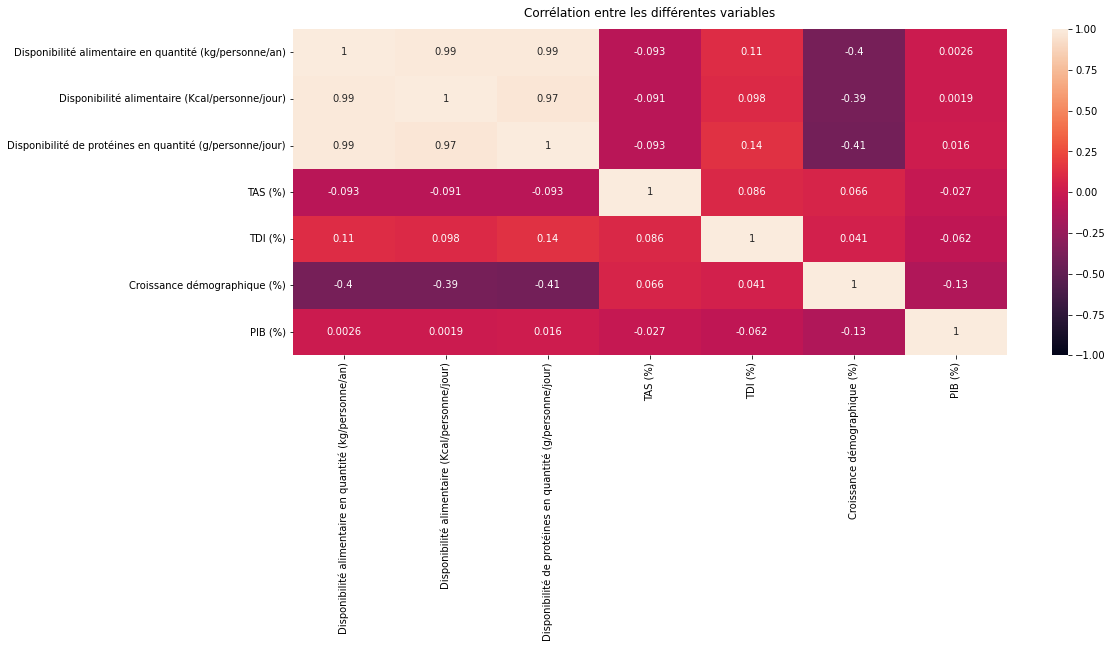

In [48]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(jointure_finale.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Corrélation entre les différentes variables', fontdict={'fontsize':12}, pad=12);

* The import dependency ratio (TDI) is **negatively (weakly)** correlated with PIB (%) 
* The import dependency ratio (TDI) is **positively (weakly)** correlated with availability and TAS (%)

# <a name="C14"> 2- Correlation Matrix</a>

In [49]:
# Display the correlation matrix
corr_df = jointure_finale.corr()
matrice_corr =pd.DataFrame(corr_df)
matrice_corr.head()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),TAS (%),TDI (%),Croissance démographique (%),PIB (%)
Disponibilité alimentaire en quantité (kg/personne/an),1.000000,0.988195,0.986107,-0.092704,0.110912,-0.395232,0.002591
Disponibilité alimentaire (Kcal/personne/jour),0.988195,1.000000,0.972537,-0.091270,0.098189,-0.391112,0.001907
Disponibilité de protéines en quantité (g/personne/jour),0.986107,0.972537,1.000000,-0.092523,0.136169,-0.410011,0.015519
TAS (%),-0.092704,-0.091270,-0.092523,1.000000,0.086302,0.066403,-0.026867
TDI (%),0.110912,0.098189,0.136169,0.086302,1.000000,0.040728,-0.061863


# <a name="C15"> 3- Distribution Check of Variables for All Individuals</a>

<AxesSubplot:ylabel='Disponibilité de protéines en quantité (g/personne/jour)'>

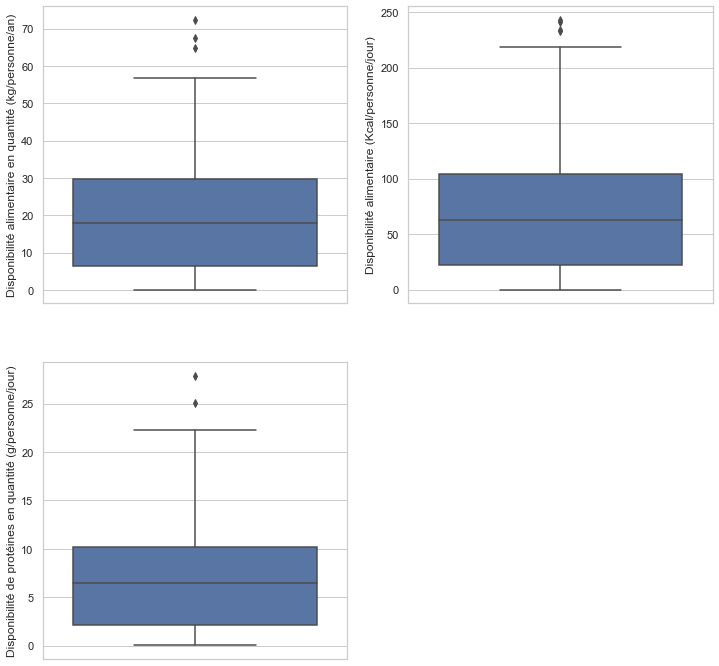

In [50]:
plt.figure(figsize=(12, 12))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=jointure_finale,  y='Disponibilité alimentaire en quantité (kg/personne/an)')
plt.subplot(222)
sns.boxplot(data=jointure_finale,  y='Disponibilité alimentaire (Kcal/personne/jour)')
plt.subplot(223)
sns.boxplot(data=jointure_finale,  y='Disponibilité de protéines en quantité (g/personne/jour)')

<AxesSubplot:ylabel='TDI (%)'>

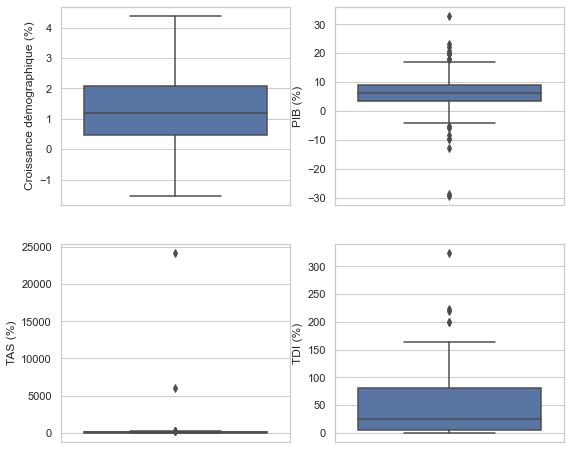

In [51]:
# Display the boxplot
plt.figure(figsize=(9, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=jointure_finale,y='Croissance démographique (%)')
plt.subplot(222)
sns.boxplot(data=jointure_finale, y='PIB (%)')
plt.subplot(223)
sns.boxplot(data=jointure_finale, y='TAS (%)')
plt.subplot(224)
sns.boxplot(data=jointure_finale,y='TDI (%)')

#### Extreme values of self-sufficiency
We observed outliers for all the variables, but opted to exclude only the extreme values of the 2 TAS variables. the countries concerned :

* Djibouti : TAS (%) 24173.02
* Maldives : TAS (%) 6043.25

In [52]:
# Display extreme values for self-sufficiency
jointure_finale.sort_values(by = ['TAS (%)'], ascending = False).head()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),TAS (%),TDI (%),Croissance démographique (%),PIB (%)
Zone,,,,,,,
Djibouti,2.68,9.0,0.92,24173.02,100.00,1.61,3.99
Maldives,13.50,47.0,4.70,6043.25,100.00,4.39,4.00
Belgique,12.65,44.0,4.57,304.61,222.37,0.58,5.08
Pays-Bas,20.33,70.0,8.48,295.70,163.44,0.24,6.17
Pologne,30.30,107.0,12.14,203.37,4.76,-0.09,11.50


In [53]:
# Exclude the 2 countries that represent extreme values
jointure =jointure_finale.drop(['Djibouti','Maldives']) 
jointure.head()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),TAS (%),TDI (%),Croissance démographique (%),PIB (%)
Zone,,,,,,,
Afghanistan,1.53,5.0,0.54,49.12,50.88,2.58,2.23
Afrique du Sud,35.69,143.0,14.11,78.71,24.27,1.43,16.11
Albanie,16.36,85.0,6.26,27.66,80.85,-0.08,9.85
Algérie,6.38,22.0,1.97,99.28,0.72,2.07,4.14
Allemagne,19.47,71.0,7.96,87.06,48.42,0.57,5.84


* Import-dependent countries (TDI) are those with the lowest self-sufficiency rates (TAS).
* Countries with a high TDI have relatively low availability.

### The averages of the variables for all individuals 

In [54]:
jointure.mean()

Disponibilité alimentaire en quantité (kg/personne/an)      20.280178
Disponibilité alimentaire (Kcal/personne/jour)              74.804734
Disponibilité de protéines en quantité (g/personne/jour)     7.149290
TAS (%)                                                     78.316568
TDI (%)                                                     44.924083
Croissance démographique (%)                                 1.255562
PIB (%)                                                      6.271183
dtype: float64

# Part 3: Clustering and Associated Visualizations

# <a name="C16"> 1- Data Normalization</a>

In [55]:
# Select the values to be used for our analysis
X = jointure.values
# Centring/reducing data so that our data can take on the same importance
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# <a name="C17"> 2- Hierarchical Clustering Analysis (CAH) with Dendrogram Visualization</a>

Creation of a link matrix using Ward's method
**Source**:
* Method **Linkage** 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
* **CAH**
https://www.xlstat.com/fr/solutions/fonctionnalites/classification-ascendante-hierarchique-cah#:~:text=classification%20ascendante%20hi%C3%A9rarchique-,La%20classification%20ascendante%20hi%C3%A9rarchique%20(CAH)%20est%20une%20m%C3%A9thode%20de%20classification,%C3%A0%20la%20nature%20des%20donn%C3%A9es.

In [56]:
Z = linkage(X_scaled, method = 'ward', metric='euclidean')

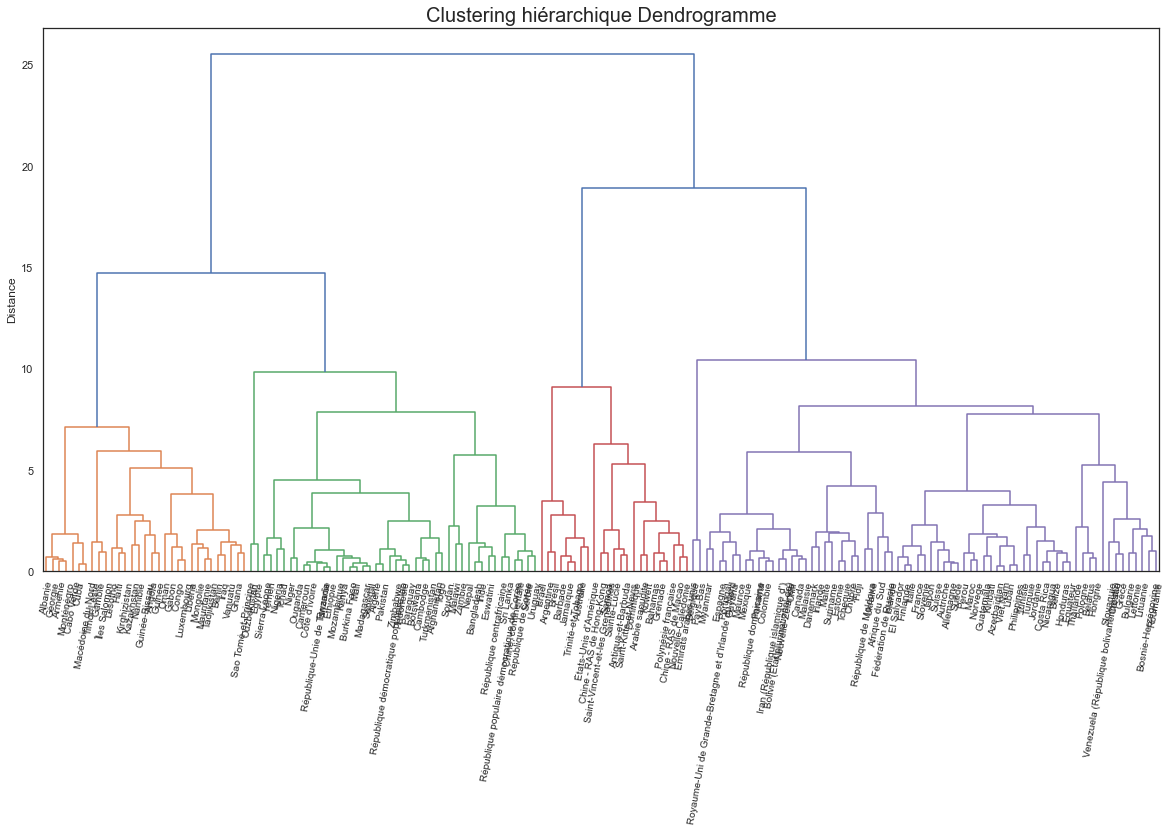

In [57]:
# Clustering hiérarchique: 
# Display of an initial global dendrogram
fig =plt.figure(figsize=(20,10))
sns.set_style('white')
plt.title('Clustering hiérarchique Dendrogramme', fontsize=20)
plt.ylabel('Distance')
dendrogram(Z, labels = jointure.index, leaf_font_size=10, color_threshold=12, orientation='top')
plt.xticks(rotation=80)
plt.show()

* The number of clusters will be 4 for this dataset.

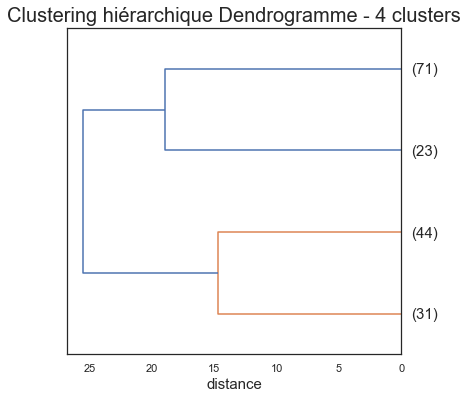

In [58]:
# Dividing the dendrogram into 4 groups to get an initial idea of partitioning
fig = plt.figure(figsize=(6,6))
plt.title('Clustering hiérarchique Dendrogramme - 4 clusters', fontsize=20)
plt.xlabel('distance', fontsize=15)
dendrogram(Z, labels = jointure.index, p=4, truncate_mode='lastp', leaf_font_size=15, orientation='left')
plt.show()

We have opted for 4 clusters as follows:

    - Cluster 1: 71 countries
    - Cluster 2: 23 countries
    - Cluster 3: 44 countries
    - Cluster 4: 31 countries

# <a name="C18"> 3- K-means Method</a>

# <a name="C19"> 3-1-  Elbow Method</a>

It is based on the fact that the sum of the intra-cluster variance can be reduced by increasing the number of clusters. The higher the number of clusters, the more refined groups can be extracted from the analysis of data objects that are more similar to each other. The turning point of the sum-of-variances curve is used to choose the right number of clusters.

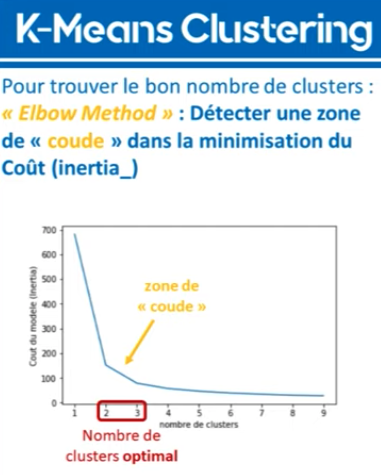

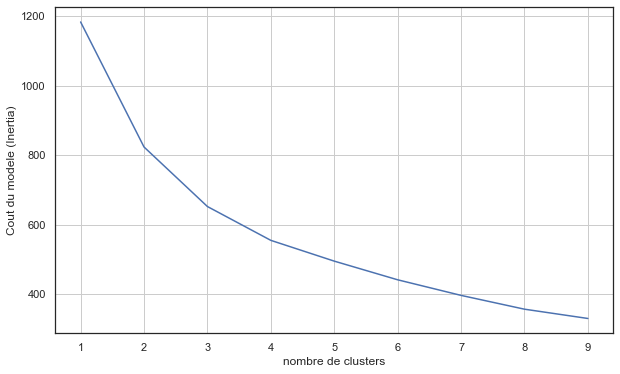

In [59]:
# An empty list for recording inertia :  
intertia = [ ]

# Our list of cluster numbers : 
k_range = range(1, 10)

# For each number of clusters : 
for k in k_range : 
    
    # Instantiate a k-means for k clusters
    kmeans = KMeans(n_clusters=k)
    
    # We train
    kmeans.fit(X_scaled)
    
    # The inertia obtained is recorded: 
    intertia.append(kmeans.inertia_)
fig = plt.figure(figsize=(10,6))
plt.plot(k_range,intertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')
plt.grid()
plt.show()

# <a name="C20"> 3-2- Display of Clusters and Centroids</a>

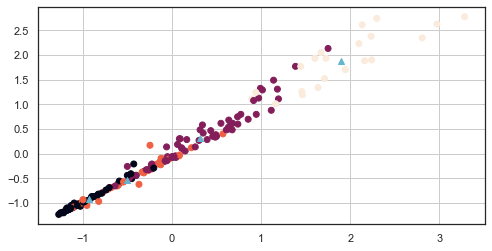

Inertie totale : 554.5293957665781


In [60]:
# Display of the point cloud (individuals) in a cluster with centroids
fig = plt.figure(figsize=(8,4))
model = KMeans(n_clusters=4)
model.fit(X_scaled)
model.predict(X_scaled)
plt.scatter(X_scaled[:,0], X_scaled[:,1],c=model.predict(X_scaled))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='^',c='c')
plt.grid()
plt.show()
# The sum of the distances between cluster points and centroids
print('Inertie totale :',model.inertia_)

# <a name="C21"> 3-3- Silhouette Coefficient</a>

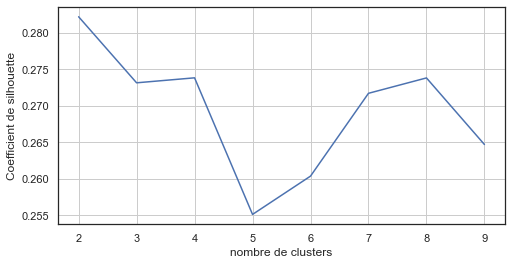

[0.28221476834855924,
 0.2731604789923343,
 0.27384286514400763,
 0.2551240931880058,
 0.26037311847587064,
 0.2717226209561605,
 0.27383023875465506,
 0.2647058356027549]

In [61]:
tab_silhouette =[]
k_range=range(2,10)
for k in k_range:
    model=KMeans(n_clusters=k)
    cluster_labels=model.fit_predict(X_scaled)
    tab_silhouette.append(silhouette_score(X_scaled,cluster_labels))

fig = plt.figure(figsize=(8,4))
plt.plot(k_range,tab_silhouette)
plt.xlabel('nombre de clusters')
plt.ylabel('Coefficient de silhouette')
plt.grid()
plt.show()
tab_silhouette

### Observations

For optimal partitioning we have combined 2 methods:

* Elbow method** * Silhouette coefficient

* Silhouette coefficient

With the elbow method, we notice that the inertia stagnates from **4 clusters**.

As with the elbow method, this time we display the evolution of the silhouette coefficient as a function of the number of clusters:

A number of 4 clusters gives the highest silhouette coefficient.

Display of the point cloud with the 4 clusters and their centroids using the Kmeans algorithm:

* The point cloud is spread out

* The number of clusters is optimal, and the centroids are well apart.

# <a name="C22"> 4- Group Analysis</a>

# <a name="C23"> 4-1- Class Splitting - Group Materialization</a>

In [62]:
# Identification of the 4 groups obtained
groupes_cah = fcluster(Z, 4, criterion='maxclust')
# Sorted group indexes
idg = np.argsort(groupes_cah)
# Display of countries according to their groups
df = pd.DataFrame(jointure.index[idg], groupes_cah[idg]).reset_index()
df2 = df.rename(columns={'index':'Groupe'})
df2.head()

,Groupe,Zone
0,1,Îles Salomon
1,1,Cuba
2,1,Oman
3,1,Iraq
4,1,Monténégro


In [63]:
#Integration of group references into our initial sample represented by the "dispoAlim" dataframe
#Internal join necessary to aggregate our data
df3 = pd.merge(jointure, df2, on='Zone')
df3.set_index('Zone', inplace=True)
df3.head()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),TAS (%),TDI (%),Croissance démographique (%),PIB (%),Groupe
Zone,,,,,,,,
Afghanistan,1.53,5.0,0.54,49.12,50.88,2.58,2.23,2
Afrique du Sud,35.69,143.0,14.11,78.71,24.27,1.43,16.11,4
Albanie,16.36,85.0,6.26,27.66,80.85,-0.08,9.85,1
Algérie,6.38,22.0,1.97,99.28,0.72,2.07,4.14,2
Allemagne,19.47,71.0,7.96,87.06,48.42,0.57,5.84,4


### Moyenne des variables par groupe 

In [64]:
# Overall average
jointure.mean()

Disponibilité alimentaire en quantité (kg/personne/an)      20.280178
Disponibilité alimentaire (Kcal/personne/jour)              74.804734
Disponibilité de protéines en quantité (g/personne/jour)     7.149290
TAS (%)                                                     78.316568
TDI (%)                                                     44.924083
Croissance démographique (%)                                 1.255562
PIB (%)                                                      6.271183
dtype: float64

In [65]:
# Display the averages for the variables in each group
groupe=(1,2,3,4)
for n in groupe:
    affi=df3.loc[df3['Groupe']==n].mean()
    print(affi)

Disponibilité alimentaire en quantité (kg/personne/an)       12.099032
Disponibilité alimentaire (Kcal/personne/jour)               41.677419
Disponibilité de protéines en quantité (g/personne/jour)      4.209355
TAS (%)                                                      21.248387
TDI (%)                                                     103.223226
Croissance démographique (%)                                  1.894516
PIB (%)                                                       7.230000
Groupe                                                        1.000000
dtype: float64
Disponibilité alimentaire en quantité (kg/personne/an)       4.539318
Disponibilité alimentaire (Kcal/personne/jour)              16.363636
Disponibilité de protéines en quantité (g/personne/jour)     1.519318
TAS (%)                                                     91.965682
TDI (%)                                                     11.527727
Croissance démographique (%)                                 2.0045

## 4 clusters 

In [66]:
# Cluster 1
cluster_1=df3.loc[df3['Groupe']==1]
cluster_1.shape

(31, 8)

In [67]:
cluster_1.head(31)

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),TAS (%),TDI (%),Croissance démographique (%),PIB (%),Groupe
Zone,,,,,,,,
Albanie,16.36,85.0,6.26,27.66,80.85,-0.08,9.85,1
Angola,10.56,35.0,3.60,13.17,86.83,3.38,16.82,1
Arménie,16.06,54.0,5.44,23.40,74.47,0.29,8.98,1
Bénin,14.40,37.0,4.98,11.18,76.40,2.79,4.53,1
Cabo Verde,17.62,62.0,6.52,10.00,120.00,1.20,5.16,1
Congo,21.53,72.0,7.45,6.36,94.55,2.60,5.71,1
Cuba,23.72,82.0,7.12,8.48,91.23,0.04,5.96,1
Gabon,29.33,99.0,10.59,5.13,97.44,2.84,3.52,1
Gambie,3.53,12.0,1.24,25.00,200.00,3.01,-0.43,1


In [68]:
# Cluster 2
cluster_2=df3.loc[df3['Groupe']==2]
cluster_2.shape

(44, 8)

In [69]:
cluster_2.head(44)

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),TAS (%),TDI (%),Croissance démographique (%),PIB (%),Groupe
Zone,,,,,,,,
Afghanistan,1.53,5.0,0.54,49.12,50.88,2.58,2.23,2
Algérie,6.38,22.0,1.97,99.28,0.72,2.07,4.14,2
Bangladesh,1.50,7.0,0.47,99.60,0.00,1.08,10.30,2
Botswana,3.39,12.0,1.19,71.43,42.86,2.09,8.96,2
Burkina Faso,2.27,8.0,0.77,100.00,0.00,2.93,6.79,2
Cambodge,2.34,11.0,0.74,73.68,26.32,1.54,9.11,2
Cameroun,3.16,11.0,1.07,98.78,0.00,2.67,4.45,2
"Chine, continentale",12.33,59.0,3.96,100.41,2.49,0.49,9.05,2
Côte d'Ivoire,2.53,8.0,0.86,89.23,10.77,2.58,4.85,2


In [70]:
# Cluster 3
cluster_3=df3.loc[df3['Groupe']==3]
cluster_3.shape

(23, 8)

In [71]:
cluster_3.head(23)

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),TAS (%),TDI (%),Croissance démographique (%),PIB (%),Groupe
Zone,,,,,,,,
Antigua-et-Barbuda,54.10,233.0,17.77,0.00,100.00,0.95,1.22,3
Arabie saoudite,43.36,151.0,15.57,42.93,50.31,2.03,4.65,3
Argentine,42.24,182.0,13.53,110.14,0.41,0.99,14.32,3
Australie,47.65,192.0,16.60,108.37,1.37,1.33,6.73,3
Bahamas,43.17,182.0,14.61,23.08,92.31,1.01,2.03,3
Barbade,46.78,199.0,15.33,88.24,11.76,0.15,3.09,3
Brésil,48.03,204.0,15.68,142.27,0.03,0.81,13.99,3
Chine - RAS de Hong-Kong,53.51,210.0,22.26,8.57,323.93,0.87,5.45,3
Chine - RAS de Macao,34.47,142.0,11.90,15.79,121.05,1.59,10.16,3


In [72]:
# Cluster 4
cluster_4=df3.loc[df3['Groupe']==4]
cluster_4.shape

(71, 8)

In [73]:
cluster_4.head(50)

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),TAS (%),TDI (%),Croissance démographique (%),PIB (%),Groupe
Zone,,,,,,,,
Afrique du Sud,35.69,143.0,14.11,78.71,24.27,1.43,16.11,4
Allemagne,19.47,71.0,7.96,87.06,48.42,0.57,5.84,4
Autriche,18.20,65.0,7.49,85.55,63.58,0.83,4.62,4
Azerbaïdjan,13.11,44.0,4.45,80.62,20.93,1.12,6.72,4
Belgique,12.65,44.0,4.57,304.61,222.37,0.58,5.08,4
Belize,25.69,110.0,8.26,105.26,0.00,2.00,0.66,4
Bolivie (État plurinational de),36.00,155.0,11.43,124.24,0.23,1.46,8.92,4
Bosnie-Herzégovine,16.70,56.0,5.66,110.91,18.18,-1.03,8.01,4
Bulgarie,22.06,81.0,8.74,68.15,68.79,-0.69,10.49,4


# <a name="C24"> 4-2- Box Plot Representation of Variable Distribution by Group</a>

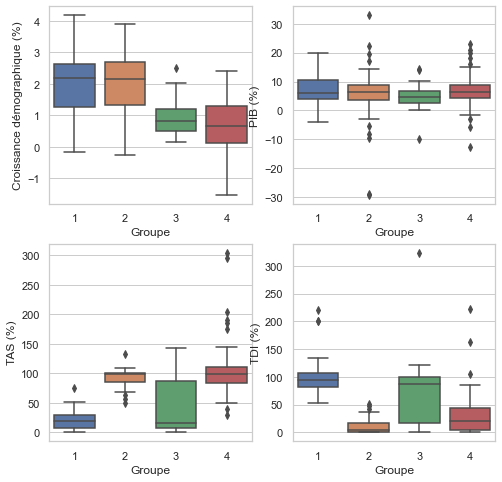

In [74]:
# Visual comparison of groups using Boxplot, with group numbers on the x-axis
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df3, x='Groupe', y='Croissance démographique (%)')
plt.subplot(222)
sns.boxplot(data=df3, x='Groupe', y='PIB (%)')
plt.subplot(223)
sns.boxplot(data=df3, x='Groupe', y='TAS (%)')
plt.subplot(224)
sns.boxplot(data=df3, x='Groupe', y='TDI (%)')
plt.savefig('Distribution des variables par groupe.jpg')

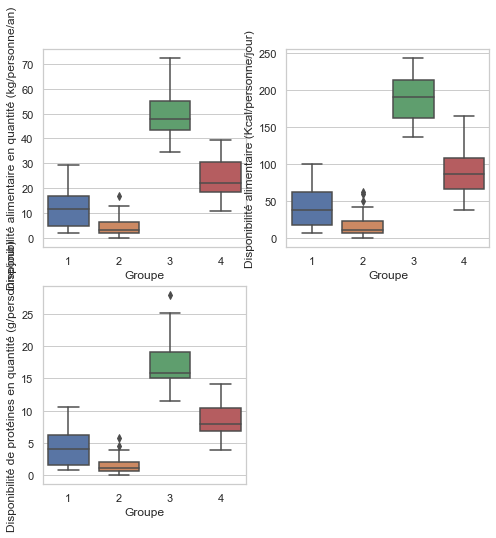

In [75]:
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df3, x='Groupe', y='Disponibilité alimentaire en quantité (kg/personne/an)')
plt.subplot(222)
sns.boxplot(data=df3, x='Groupe', y='Disponibilité alimentaire (Kcal/personne/jour)')
plt.subplot(223)
sns.boxplot(data=df3, x='Groupe', y='Disponibilité de protéines en quantité (g/personne/jour)')
plt.savefig('Distribution des variables par groupe_suite.jpg')

### characteristics of each group

#### Group 1
This group essentially includes countries with :

* One of the highest import dependency rates
* One of the lowest self-sufficiency rates
* One of the highest demographic growth rates
* Lowest availability
* The highest GDP

#### Group 2
This group essentially includes countries with :

* One of the lowest import dependency rates
* One of the highest rates of self-sufficiency
* High population growth
* Very low availability
* High GDP

#### Group 3

This group essentially includes countries with :

* A high import dependency rate
* A very low rate of self-sufficiency
* Low population growth
* Very high availability
* Very low GDP

#### Group 4

This group essentially includes countries with :

* One of the lowest import dependency rates
* One of the highest rates of self-sufficiency
* Low population growth
* High availability
* High GDP

### Observations

One group has interesting characteristics for our export target:

Group 1
In view of the characteristics of each group, the most favourable combination for selecting the best group in terms of poultrymeat requirements is group number 1:

* Disponibilité alimentaire en quantité (kg/personne/an) :      **12.099032**
* Disponibilité alimentaire (Kcal/personne/jour)            :   **41.677419**
* Disponibilité de protéines en quantité (g/personne/jour) :     **4.209355**
* TAS (%)                                                    :  **21.248387**
* TDI (%)                                                   :  **103.223226**
* Croissance démographique (%)                                :  **1.894516**
* PIB (%)                                                     :  **7.230000**


* The import dependency rate is very high, while the self-sufficiency rate is very low.

* GDP is the highest in the world

* High population growth

* Food availability is also relatively low.

# <a name="C25"> 4-3- Cross-Analysis of Country Clusters with Different Variables</a>

Text(0.5, 1.0, 'CLUSTER')

<Figure size 504x504 with 0 Axes>

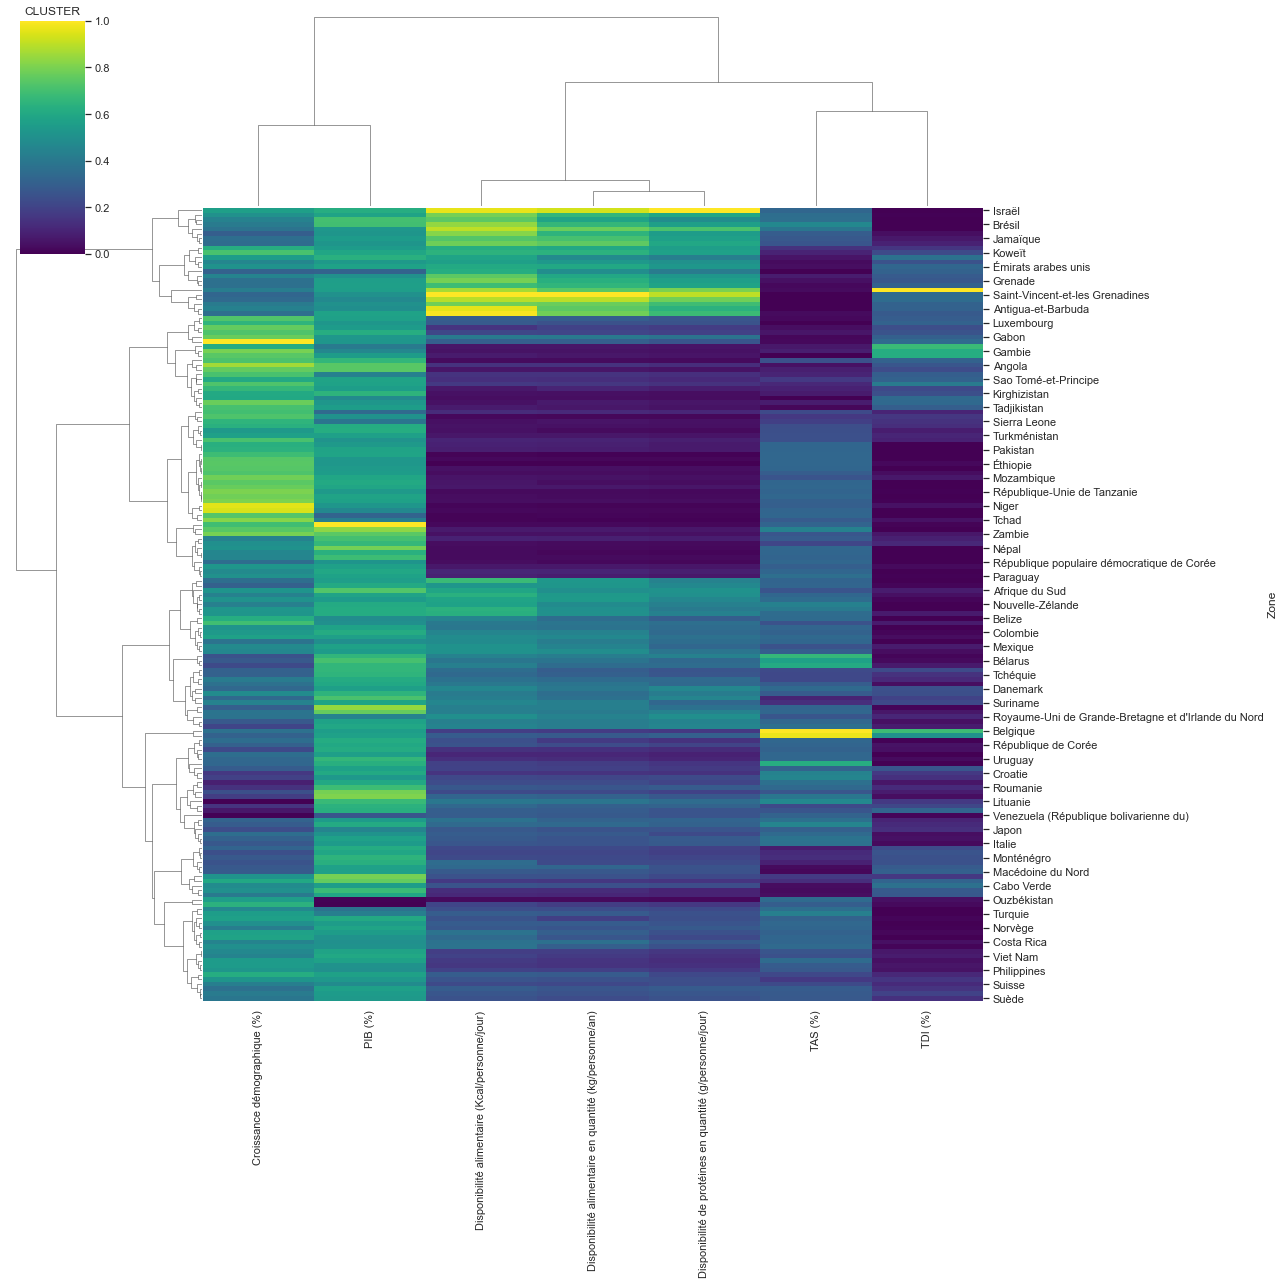

In [76]:
# heatmap with crosses between country clusters and the various variables
plt.figure(figsize=(7, 7))
sns.clustermap(jointure, cmap = 'viridis',method = 'ward',metric = 'euclidean',standard_scale =1,figsize = (18, 18))
plt.title('CLUSTER')

### Observations

The heatmap clearly shows the combination of cluster 1 with the variables (indicators) :

 - High TDI
 - High population growth
 - Low TAS
 - High GDP
 - Low availability
 
 Group 1 does seem to be the ideal cluster. We continue our analysis to confirm these observations

# <a name="C26"> 4-4- Correlations Between Variables in Each Group</a>

We are looking for a cluster that best matches the criteria below:

* TDI negatively correlated with TAS, availabilities and total population.


This would correspond to countries that still have a need for poultry meat.

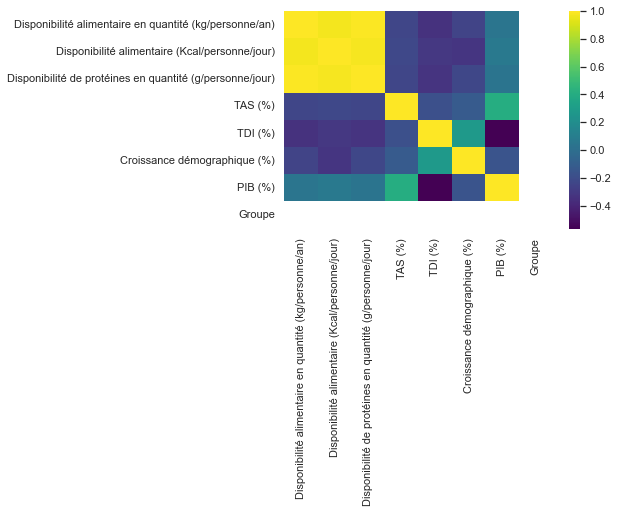

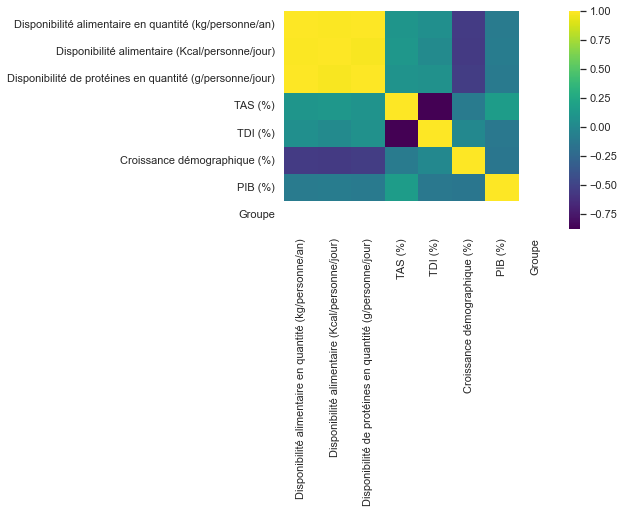

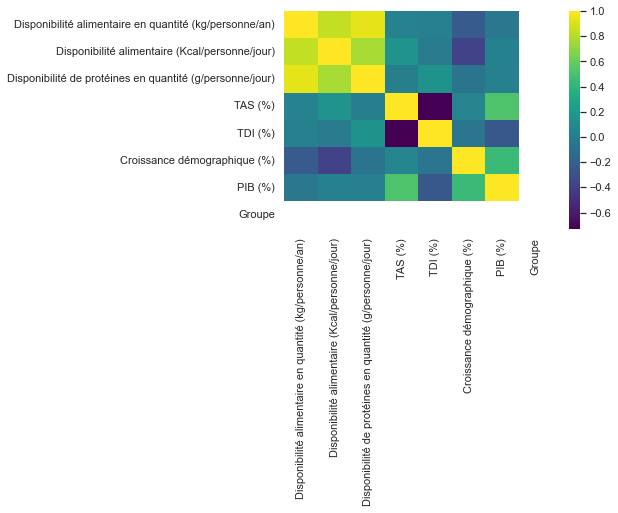

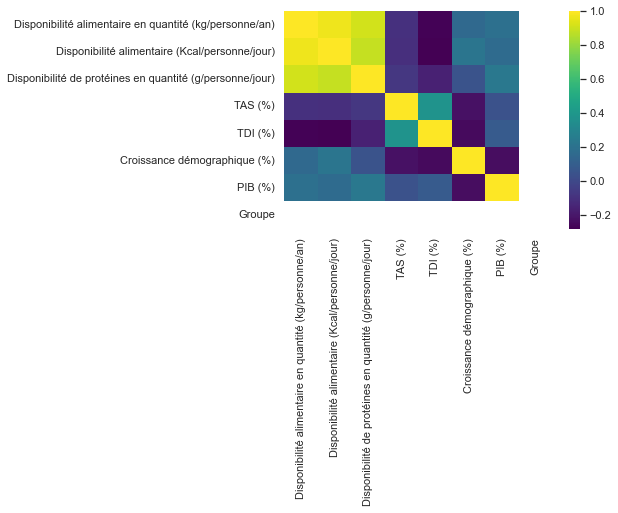

In [77]:
# heatmap of correlations between the different variables in each cluster
groupe=(cluster_1,cluster_2,cluster_3,cluster_4)
for n in groupe:
    sns.heatmap(n.corr(),cmap='viridis')  
    plt.show()

### Observations

The heatmap for cluster number 1 confirms our choice

# <a name="C27"> 5- Principal Component Analysis (PCA)</a>

In [78]:
# We will only work on the first 5 components:
n_components = 5

# Calculation of principal components (We instantiate our PCA):
pca = PCA(n_components=n_components)
# We train it on scaled data:
pca.fit(X_scaled)
#Let's now look at the variance captured by each new component. 
#Thanks to scikit-learn we can use the explained_variance_ratio_ attribute:
pca.explained_variance_ratio_
# Let's record this in a variable :
scree = (pca.explained_variance_ratio_*100).round(2)
print(scree)
scree_cum = scree.cumsum().round()
print(scree_cum)
# Next, let's define a variable with the list of our components:
x_list = range(1, n_components+1)
list(x_list)

[45.87 22.53 14.06 10.62  6.43]
[ 46.  68.  82.  93. 100.]


[1, 2, 3, 4, 5]

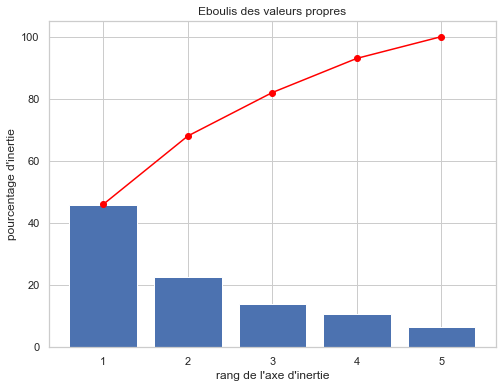

In [79]:
# Finally, it can be displayed graphically:
plt.figure(figsize=(8,6))
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

### Observations

* In blue we have the variance of each new component, and in red the cumulative variance.

In our case, the total inertia is distributed unequally over 5 axes

- Axis 1: 45.87% of total inertia
- Axis 2: 22.53% of total inertia
- Axis 3: 14.06% of total inertia
- Axis 4: 10.62% of total inertia
- Axis 5: 6.43% of total inertia


* We can see here that more than 80% of the variance is included in the first 3 components, and more than 90% in the first 4.

## Components

In [80]:
# The formula for this calculation is given by the components_ attribute. This variable is generally called pcs :
pcs = pca.components_
# Let's display the same thing but in a panda version:
pcs = pd.DataFrame(pcs)

In [81]:
# Choosing the number of components to calculate
n_comp = 5
# Selection of columns to be taken into account in the PCA
features = jointure.columns
# Correlation circle

# <a name="C28"> 6- Correlation Circles</a>

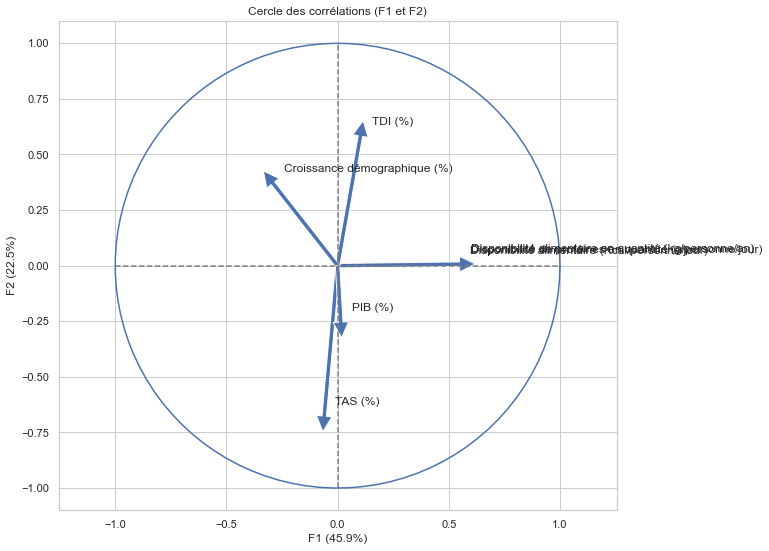

In [82]:
# Let's define our x and y axes. We're going to use the first 2 components. As - in code - we start counting from 0, this gives us :
x_y = (0,1)
x_y
# We can turn it into a function:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Displays the correlation graph

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : our PCA object which has been fit
    x_y : list or tuple : the x,y pair of planes to display, e.g. [0,1] for F1, F2
    features: list or tuple: the list of features (i.e. dimensions) to represent
    """

    # Extract x and y 
    x,y=x_y

    # Image size (in inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # For each component : 
    for i in range(0, pca.components_.shape[1]):

        # The arrows
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Displaying horizontal and vertical lines
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Axis names, with percentage of inertia explained
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # I copied and pasted the code without reading it
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes & display
    plt.axis('equal')
    plt.show(block=False)
# Correlation circle (F1 and F2)
correlation_graph(pca, (0,1), features)

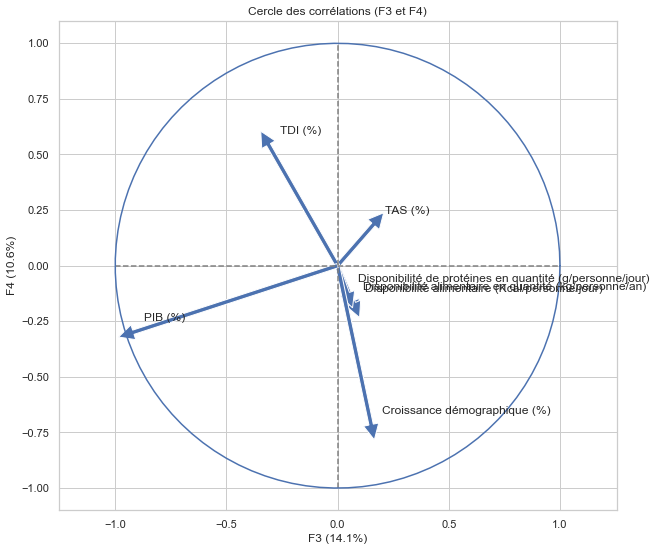

In [83]:
# Let's try for F3 and F4 :
correlation_graph(pca, (2,3), features)

## Correlation of variables with principal components

In [84]:
# creation of the correlation matrix
t=pca.components_[:]
df_corr_comp = pd.DataFrame(t,index = ['F1', 'F2', 'F3','F4','F5'],columns=jointure.columns)
df_corr_comp.head()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),TAS (%),TDI (%),Croissance démographique (%),PIB (%)
F1,0.549471,0.546068,0.548692,-0.060032,0.102845,-0.290580,0.014497
F2,0.010666,0.002217,0.006870,-0.676749,0.582960,0.370773,-0.254029
F3,0.064870,0.071614,0.043825,0.161423,-0.310715,0.150863,-0.918358
F4,-0.160257,-0.168983,-0.123600,0.185112,0.544010,-0.714622,-0.299311
F5,0.065788,0.070711,0.105225,0.691005,0.505414,0.494440,0.046866


### COMMENTS

**F1 :** 

- Positively correlated variables: All availabilities are correlated (0.55)

- We can say that the F1 axis represents availability.

**F2 :**

- Positively correlated variables : TDI is strongly correlated (0.58)
- variables correlated negatively : TAS is strongly correlated (- 0.68)

* It can be said that countries with a high TDI have a positive trend in terms of population growth and a low TAS.

**F3 :**

- negatively correlated variables: GDP is very strongly correlated (- 0.92)

**F4 :**

- positively correlated variables : TDI is strongly correlated (0.54)
- negatively correlated variables : Population growth is strongly correlated (- 0.71)

* It can be said that on this axis, countries with a high TDI also have a positive trend in terms of TAS and low demographic growth.

# <a name="C29"> 7- Projection of Individuals</a>

* We will use 4 principal components to project individuals.

In [85]:
# Let's now work on the projection of our dimensions. 
# First, let's calculate the coordinates of our individuals in the new space:
X_projected = pca.transform(X_scaled)
X_projected[:5]

array([[-2.2334183 ,  1.03418514,  0.35367428, -0.20226707, -0.07446409],
       [ 1.76288599, -0.50728555, -0.91104818, -1.23835774,  0.21943031],
       [ 0.359889  ,  0.53176833, -1.03412019,  0.92842167, -0.95768216],
       [-1.79631987, -0.4601069 ,  0.55904589, -0.42020503, -0.00396507],
       [ 0.19184213, -0.29517027, -0.03167079,  0.5304002 , -0.14288446]])

In [86]:
# Remember that :
x_y
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Displays the projection of individuals

    Positional arguments : 
    -------------------------------------
    X_projected: np.array, pd.DataFrame, list of list: the matrix of projected points
    x_y: list or tuple: the x,y pair of planes to be displayed, e.g. [0,1] for F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : a PCA object which has been fit, this will allow us to display the variance of each component, default = None
    labels : list or tuple : the labels of the individuals to be projected, default = None
    clusters : list or tuple : the list of clusters to which each individual belongs, default = None
    alpha : float in [0,1] : transparency parameter, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list or tuple : width, height pair which defines the size of the figure in inches, default = [10,8]. 
    marker : str : the type of marker used to represent individuals, crosshairs etc etc, default = ".
    """

    # Transforms X_projected into np.array
    X_ = np.array(X_projected)

    # We define the shape of the figure if it has not been given
    if not figsize: 
        figsize = (7,6)

    # Managing labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # Check the axis variable 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # We define x and y 
    x, y = x_y

    # Initialising the figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # We check whether there are clusters or not
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter( X_[ :, x], X_[ :, y], alpha=alpha, 
    # c=c, cmap="Set1", marker=marqueur)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c,palette=['green','orange','brown','red'],)

    # If the pca variable has been supplied, we can calculate the % variance of each axis 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Axis names, with percentage of inertia explained
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # x max and y max values
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # Bound x and y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Displaying horizontal and vertical lines
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Displaying point labels
    if len(labels) : 
        
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Title and display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

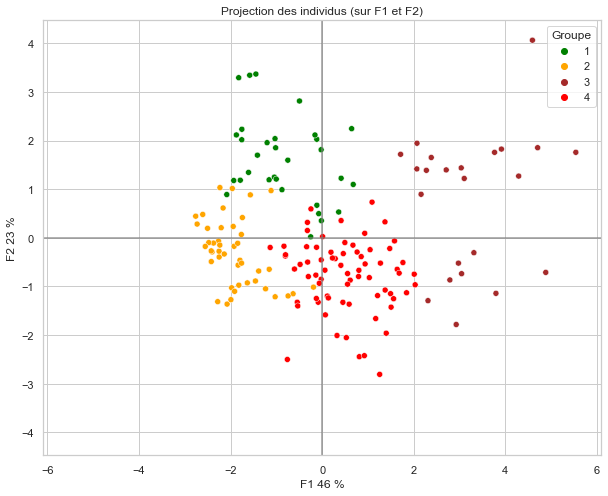

In [87]:
# Let's try the simple version with F1 and F2, the colours correspond to the group :
x_y = [0,1]
display_factorial_planes(X_projected, x_y,pca, clusters=df3["Groupe"],alpha = 1)

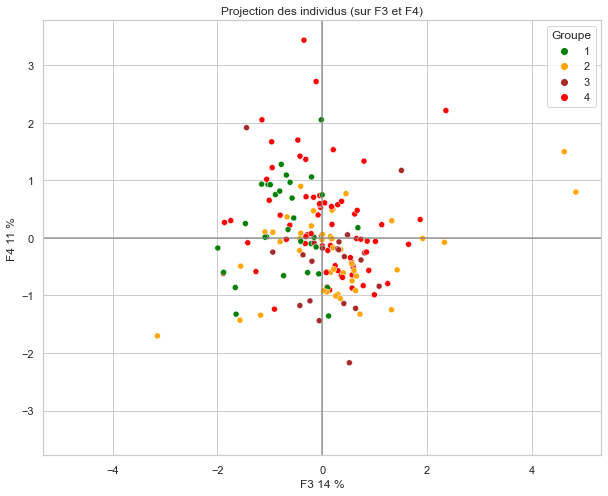

In [88]:
# Let's try the simple version with F3 and F4, the colours correspond to the group :
x_y = [2,3]
display_factorial_planes(X_projected, x_y,pca, clusters=df3["Groupe"],alpha = 1)

### Observations

On plan 1, we observe cluster 1, which is well presented on the F1 axis in the positive part of the TDI and the negative part of the F1 axis (availabilities).

This cluster has the following criteria:

* High TDI
* Low TAS
* Relatively high demographic growth
* Very low availability

In [89]:
# Insert the 'total population' column and display the results by availability in kcal (ascending display)
population_totale=df_pop_nv.loc[:,[2017]]
population_totale.rename(columns ={2017: "Population totale"}, inplace= True)
cluster_final =cluster_1.merge(population_totale,on='Zone',how='inner')
groupe_candidat=cluster_final.loc[:,cluster_final.columns != 'Groupe']
groupe_candidat.sort_values(by = ['Disponibilité alimentaire (Kcal/personne/jour)'], ascending = True).head()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),TAS (%),TDI (%),Croissance démographique (%),PIB (%),Population totale
Zone,,,,,,,,
Guinée-Bissau,2.16,7.0,0.74,75.00,100.00,2.56,11.66,1828.145
Mongolie,2.77,9.0,0.95,0.00,111.11,1.88,0.25,3113.786
Mauritanie,5.14,11.0,1.59,22.73,109.09,2.86,3.32,4282.570
Kirghizistan,3.10,11.0,1.08,21.88,78.12,1.90,10.95,6189.733
Gambie,3.53,12.0,1.24,25.00,200.00,3.01,-0.43,2213.889


# <a name="C30"> 8- Exploration of Selected Cluster</a>

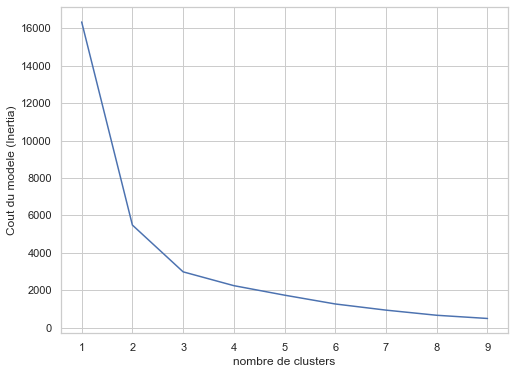

In [91]:
Y= cluster_1.values
std_scale2 = preprocessing.StandardScaler().fit(Y)
X_scaled2 = std_scale2.transform(Y)
# Creation of a link matrix using Ward's method
Z2 = linkage(X_scaled2, method = 'ward', metric='euclidean')
inertia2 = []
k_range2=range(1,10)
for k2 in k_range2:
    kmeans = KMeans(n_clusters=k2)
    kmeans.fit(Z2)
    inertia2.append(kmeans.inertia_)
plt.figure(figsize=(8,6))
plt.plot(k_range2,inertia2 )
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)');

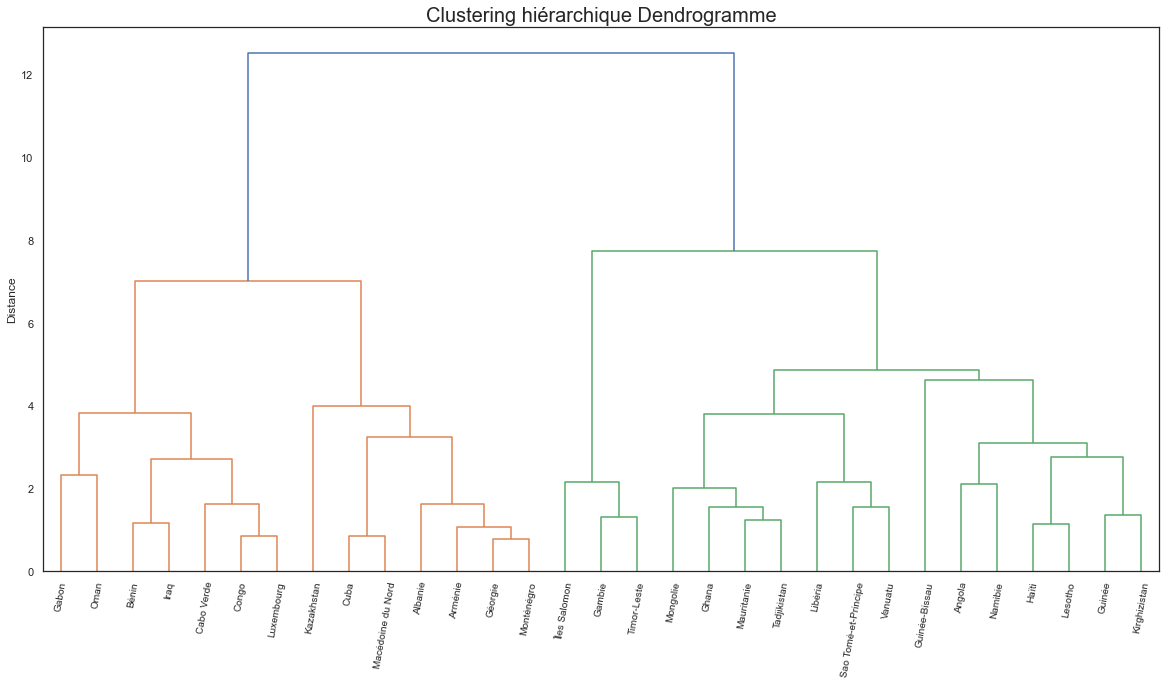

In [92]:
Z2 = linkage(X_scaled2, method = 'ward', metric='euclidean')
#Hierarchical clustering: 
#Display of a first global dendrogram
fig =plt.figure(figsize=(20,10))
sns.set_style('white')
plt.title('Clustering hiérarchique Dendrogramme', fontsize=20)
plt.ylabel('Distance')
dendrogram(Z2, labels = cluster_1.index, leaf_font_size=10, color_threshold=12, orientation='top')
plt.xticks(rotation=80)
plt.show()

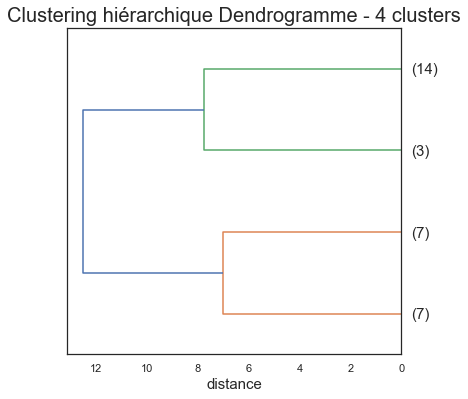

In [93]:
#Dividing the dendrogram into 4 groups to get an initial idea of partitioning
fig = plt.figure(figsize=(6,6))
plt.title('Clustering hiérarchique Dendrogramme - 4 clusters', fontsize=20)
plt.xlabel('distance', fontsize=15)
dendrogram(Z2, labels = cluster_1.index, p=4, truncate_mode='lastp', leaf_font_size=15, orientation='left')
plt.show()

### Displaying clusters using the KMeans method

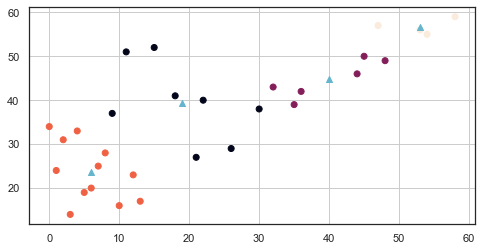

Inertie totale : 2283.1919528638973


In [94]:
# Display of the point cloud (individuals) in a cluster with centoids
fig = plt.figure(figsize=(8,4))
model3 = KMeans(n_clusters=4)
model3.fit(Z2)
model3.predict(Z2)
plt.scatter(Z2[:,0], Z2[:,1],c=model3.predict(Z2))
plt.scatter(model3.cluster_centers_[:,0], model3.cluster_centers_[:,1], marker='^',c='c')
plt.grid()
plt.show()
print('Inertie totale :',model3.inertia_)

In [95]:
#Identification of the 3 groups obtained
groupes = fcluster(Z2, 4, criterion='maxclust')
# Sorted group indexes
idg2 = np.argsort(groupes)
# Display of countries according to their groups
df_groupe = pd.DataFrame(cluster_1.index[idg2], groupes[idg2]).reset_index()
df_groupe2 = df_groupe.rename(columns={'index':'Sous_Groupes'})
df_groupe2['Sous_Groupes'].unique()

array([1, 2, 3, 4])

In [96]:
# Integration of group references into our initial sample represented by the dataframe
# Internal join required to aggregate our data
df_gr = pd.merge(cluster_1, df_groupe2, on='Zone')
df_gr.set_index('Zone', inplace=True)
df_groupe3 =df_gr.merge(population_totale,on='Zone',how='inner')
df_groupe3.head()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),TAS (%),TDI (%),Croissance démographique (%),PIB (%),Groupe,Sous_Groupes,Population totale
Zone,,,,,,,,,,
Albanie,16.36,85.0,6.26,27.66,80.85,-0.08,9.85,1,2,2884.169
Angola,10.56,35.0,3.60,13.17,86.83,3.38,16.82,1,4,29816.766
Arménie,16.06,54.0,5.44,23.40,74.47,0.29,8.98,1,2,2944.791
Bénin,14.40,37.0,4.98,11.18,76.40,2.79,4.53,1,1,11175.198
Cabo Verde,17.62,62.0,6.52,10.00,120.00,1.20,5.16,1,1,537.498


<AxesSubplot:xlabel='Sous_Groupes', ylabel='TDI (%)'>

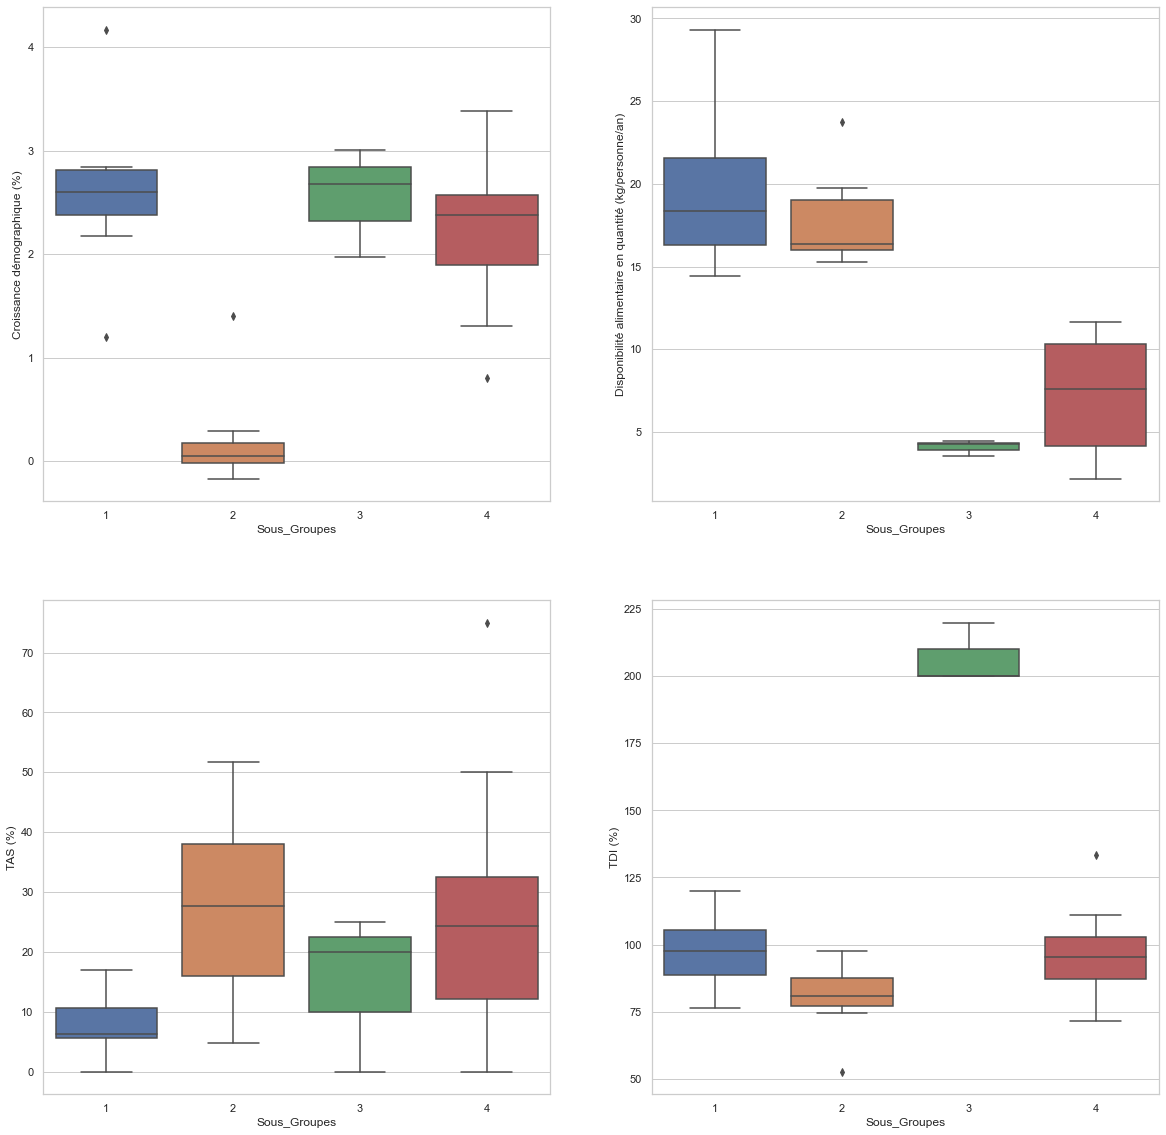

In [97]:
# Visual comparison of groups using Boxplot, with group numbers on the x-axis
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df_groupe3, x='Sous_Groupes', y='Croissance démographique (%)')
plt.subplot(222)
sns.boxplot(data=df_groupe3, x='Sous_Groupes', y='Disponibilité alimentaire en quantité (kg/personne/an)')
plt.subplot(223)
sns.boxplot(data=df_groupe3, x='Sous_Groupes', y='TAS (%)')
plt.subplot(224)
sns.boxplot(data=df_groupe3, x='Sous_Groupes', y='TDI (%)')

<AxesSubplot:xlabel='Sous_Groupes', ylabel='Population totale'>

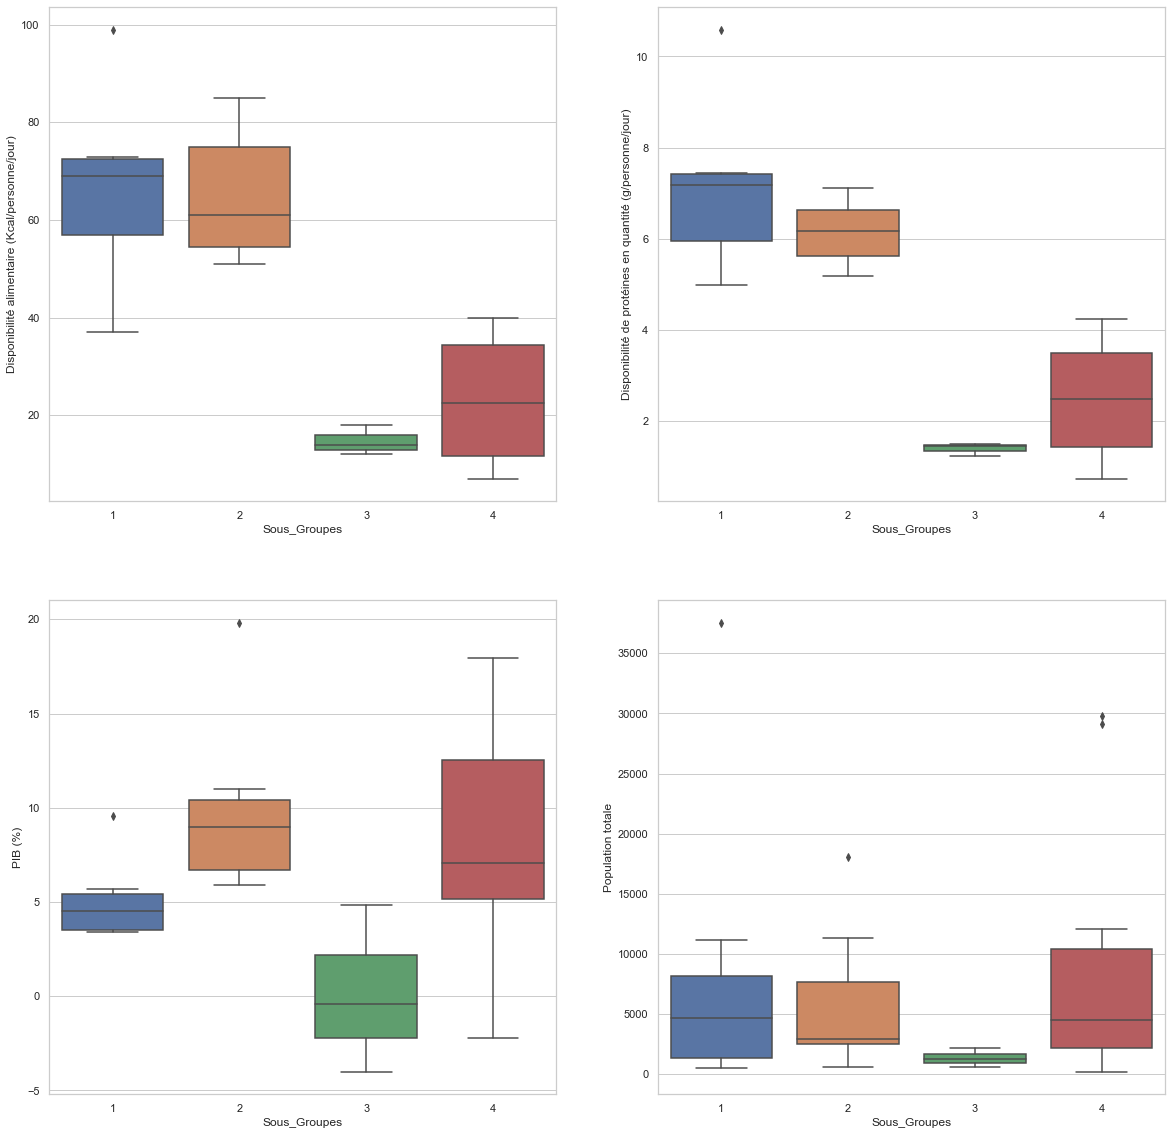

In [98]:
plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=df_groupe3, x='Sous_Groupes', y='Disponibilité alimentaire (Kcal/personne/jour)')
plt.subplot(222)
sns.boxplot(data=df_groupe3, x='Sous_Groupes', y='Disponibilité de protéines en quantité (g/personne/jour)')
plt.subplot(223)
sns.boxplot(data=df_groupe3, x='Sous_Groupes', y='PIB (%)')
plt.subplot(224)
sns.boxplot(data=df_groupe3, x='Sous_Groupes', y='Population totale')

In [99]:
# Cluster 1_1
cluster_1_1=df_groupe3.loc[df_groupe3['Sous_Groupes']==1]
cluster_1_1.head()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),TAS (%),TDI (%),Croissance démographique (%),PIB (%),Groupe,Sous_Groupes,Population totale
Zone,,,,,,,,,,
Bénin,14.40,37.0,4.98,11.18,76.40,2.79,4.53,1,1,11175.198
Cabo Verde,17.62,62.0,6.52,10.00,120.00,1.20,5.16,1,1,537.498
Congo,21.53,72.0,7.45,6.36,94.55,2.60,5.71,1,1,5110.695
Gabon,29.33,99.0,10.59,5.13,97.44,2.84,3.52,1,1,2064.823
Iraq,14.95,52.0,5.37,16.96,83.04,2.57,9.55,1,1,37552.781


In [100]:
# Cluster 1_2
cluster_1_2=df_groupe3.loc[df_groupe3['Sous_Groupes']==2]
cluster_1_2.head()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),TAS (%),TDI (%),Croissance démographique (%),PIB (%),Groupe,Sous_Groupes,Population totale
Zone,,,,,,,,,,
Albanie,16.36,85.0,6.26,27.66,80.85,-0.08,9.85,1,2,2884.169
Arménie,16.06,54.0,5.44,23.40,74.47,0.29,8.98,1,2,2944.791
Cuba,23.72,82.0,7.12,8.48,91.23,0.04,5.96,1,2,11339.254
Géorgie,15.27,51.0,5.19,36.07,83.61,-0.17,7.45,1,2,4008.716
Kazakhstan,18.27,61.0,6.18,51.66,52.57,1.40,19.83,1,2,18080.019


In [101]:
# Cluster 1_3
cluster_1_3=df_groupe3.loc[df_groupe3['Sous_Groupes']==3]
cluster_1_3.head()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),TAS (%),TDI (%),Croissance démographique (%),PIB (%),Groupe,Sous_Groupes,Population totale
Zone,,,,,,,,,,
Gambie,3.53,12.0,1.24,25.0,200.0,3.01,-0.43,1,3,2213.889
Timor-Leste,4.24,14.0,1.46,20.0,220.0,1.97,-4.01,1,3,1243.258
Îles Salomon,4.45,18.0,1.51,0.0,200.0,2.68,4.83,1,3,636.039


In [102]:
# Cluster 1_4
cluster_1_4=df_groupe3.loc[df_groupe3['Sous_Groupes']==4]
cluster_1_4.head()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),TAS (%),TDI (%),Croissance démographique (%),PIB (%),Groupe,Sous_Groupes,Population totale
Zone,,,,,,,,,,
Angola,10.56,35.0,3.60,13.17,86.83,3.38,16.82,1,4,29816.766
Ghana,7.24,16.0,2.26,28.44,71.56,2.25,5.18,1,4,29121.465
Guinée,4.08,14.0,1.42,26.00,74.00,2.80,16.73,1,4,12067.519
Guinée-Bissau,2.16,7.0,0.74,75.00,100.00,2.56,11.66,1,4,1828.145
Haïti,8.91,31.0,2.75,9.18,90.82,1.31,12.80,1,4,10982.366


In [103]:
# Display the averages of the variables in each sub-group
groupe=(1,2,3,4)
for n in groupe:
    moy=df_groupe3.loc[df_groupe3['Sous_Groupes']==n].mean()
    print('Groupe',n,moy)

Groupe 1 Disponibilité alimentaire en quantité (kg/personne/an)        19.684286
Disponibilité alimentaire (Kcal/personne/jour)                66.285714
Disponibilité de protéines en quantité (g/personne/jour)       7.068571
TAS (%)                                                        7.967143
TDI (%)                                                       97.422857
Croissance démographique (%)                                   2.621429
PIB (%)                                                        5.057143
Groupe                                                         1.000000
Sous_Groupes                                                   1.000000
Population totale                                           8814.119000
dtype: float64
Groupe 2 Disponibilité alimentaire en quantité (kg/personne/an)        17.912857
Disponibilité alimentaire (Kcal/personne/jour)                65.142857
Disponibilité de protéines en quantité (g/personne/jour)       6.141429
TAS (%)                        

### Observations
As with the group analysis, some sub-groups have characteristics that are more favourable to our objective.

Group 4 has the following criteria:

* Very high TDI
* Very low TAS
* Low availability
* High GDP


* We can see that these countries have low availabilities while the TDI is high.

* These countries could be a relevant destination for poultrymeat exports

In [104]:
cluster_1_4.sort_values(by = ['TAS (%)'], ascending = True).head(10)

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),TAS (%),TDI (%),Croissance démographique (%),PIB (%),Groupe,Sous_Groupes,Population totale
Zone,,,,,,,,,,
Mongolie,2.77,9.0,0.95,0.00,111.11,1.88,0.25,1,4,3113.786
Tadjikistan,4.45,18.0,1.45,5.00,95.00,2.50,5.15,1,4,8880.268
Haïti,8.91,31.0,2.75,9.18,90.82,1.31,12.80,1,4,10982.366
Lesotho,7.93,27.0,2.72,11.76,88.24,0.80,7.26,1,4,2091.534
Angola,10.56,35.0,3.60,13.17,86.83,3.38,16.82,1,4,29816.766
Kirghizistan,3.10,11.0,1.08,21.88,78.12,1.90,10.95,1,4,6189.733
Mauritanie,5.14,11.0,1.59,22.73,109.09,2.86,3.32,1,4,4282.570
Guinée,4.08,14.0,1.42,26.00,74.00,2.80,16.73,1,4,12067.519
Ghana,7.24,16.0,2.26,28.44,71.56,2.25,5.18,1,4,29121.465


# <a name="C31"> Conclusion</a>

The group of countries corresponding to the selection criteria in terms of poultry meat requirements is group 1. From this group we have selected the countries that best correspond to the profile we are looking for.

We have chosen sub-group 4

* Mongolia
* Tajikistan
* Haiti
* Lesotho
* Angola
* Kyrgyzstan
* Mauritania
* Guinea
* Ghana
* Liberia


All these countries have a high import dependency rate and conversely a low self-sufficiency rate.